## set up

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import os
from glob import glob
from scipy.stats import norm
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
from models.VAE import VariationalAutoencoder
from utils.loaders import load_model, ImageLabelLoader

Found 5216 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


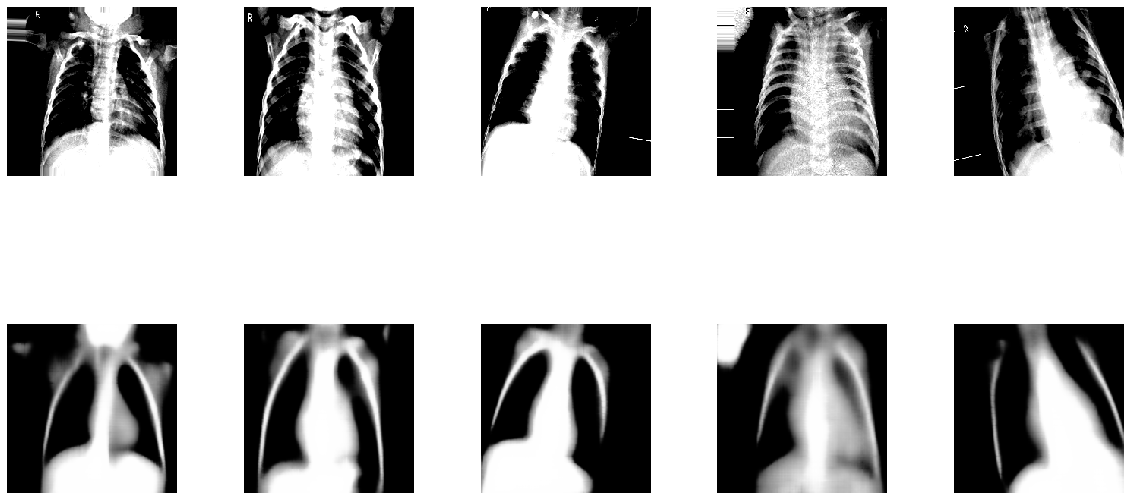

In [2]:
# run params
section = 'vae'
run_id = '0004'
data_name = 'x-ray_old'
RUN_FOLDER = 'run/{}/'.format(section)
RUN_FOLDER += '_'.join([run_id, data_name])
#train_dir_norm = "data/X-ray_dataset_old/chest_xray/train/NORMAL"
#train_dir_pneu = "data/X-ray_dataset_old/chest_xray/train/PNEUMONIA"
#test_dir_norm = "data/X-ray_dataset_old/chest_xray/test/NORMAL"
#test_dir_pneu = "data/X-ray_dataset_old/chest_xray/test/PNEUMONIA"
#test_dir = "data/X-ray_dataset_old/chest_xray/test/PNEUMONIA"
#filenames_train_norm = os.listdir(train_dir_norm)
#filenames_train_pneu = np.array(glob(os.path.join(train_dir_pneu, '*.jpeg')))
#filenames_test_norm = os.listdir(test_dir_norm)
#filenames_test_pneu = np.array(glob(os.path.join(test_dir_pneu, '*.jpeg')))
n_to_show = 5
#example_idx_norm = np.random.choice(range(len(filenames_train_norm)), 10)
#example_idx_pneu = np.random.choice(range(len(filenames_train_pneu)), 5)
#example_images = filenames_train_norm[example_idx_norm]
train_dir = "data/X-ray_dataset_old/chest_xray/train"
test_dir = "data/X-ray_dataset_old/chest_xray/test"
INPUT_DIM = (224,224,3)
BATCH_SIZE = 32
data_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    samplewise_center=True,
    samplewise_std_normalization=True
)
train = data_gen.flow_from_directory(train_dir, 
                                            batch_size=BATCH_SIZE, 
                                            shuffle=True, 
                                            class_mode='input',
                                            subset = "training",
                                            target_size=INPUT_DIM[:2])
example_batch = next(train)
example_images = example_batch[0]
vae = load_model(VariationalAutoencoder, RUN_FOLDER)
z_points = vae.encoder.predict(example_images)

reconst_images = vae.decoder.predict(z_points)

fig = plt.figure(figsize=(20, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(n_to_show):
    img = example_images[i].squeeze()
    sub = fig.add_subplot(2, n_to_show, i+1)
    sub.axis('off')
    #sub.text(0.5, -0.35, str(np.round(z_points[i],1)), fontsize=10, ha='center', transform=sub.transAxes)
            
    sub.imshow(img, cmap='gray_r')

for i in range(n_to_show):
    img = reconst_images[i].squeeze()
    sub = fig.add_subplot(2, n_to_show, i+n_to_show+1)
    sub.axis('off')
    sub.imshow(img, cmap='gray_r')




Found 624 images belonging to 2 classes.


W1216 13:35:38.565904 139939222746944 image.py:656] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W1216 13:35:38.574458 139939222746944 image.py:656] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W1216 13:35:38.583095 139939222746944 image.py:656] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W1216 13:35:38.593208 139939222746944 image.py:656] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W1216 13:35:38.602865 139939222746944 image.py:656] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


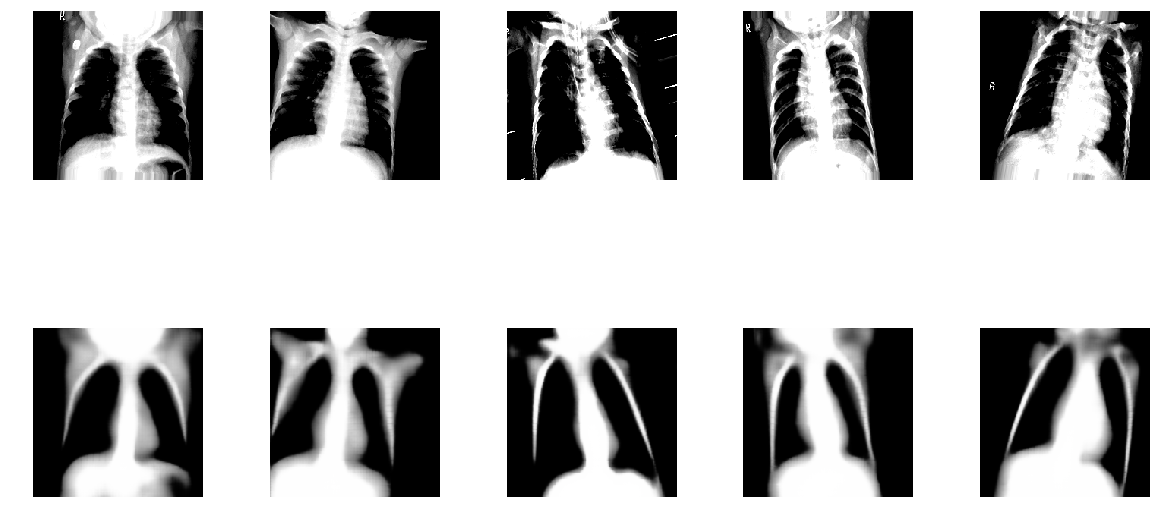

In [3]:
test = data_gen.flow_from_directory(test_dir, 
                                            batch_size=BATCH_SIZE, 
                                            shuffle=True, 
                                            class_mode='input',
                                            target_size=INPUT_DIM[:2])
example_batch = next(test)
example_images = example_batch[0]
vae = load_model(VariationalAutoencoder, RUN_FOLDER)
z_points = vae.encoder.predict(example_images)

reconst_images = vae.decoder.predict(z_points)


fig = plt.figure(figsize=(20, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(n_to_show):
    img = example_images[i].squeeze()
    sub = fig.add_subplot(2, n_to_show, i+1)
    sub.axis('off')
    #sub.text(0.5, -0.35, str(np.round(z_points[i],1)), fontsize=10, ha='center', transform=sub.transAxes)
            
    sub.imshow(img, cmap='gray_r')

for i in range(n_to_show):
    img = reconst_images[i].squeeze()
    sub = fig.add_subplot(2, n_to_show, i+n_to_show+1)
    sub.axis('off')
    sub.imshow(img, cmap='gray_r')
